#### The Jupyter Notebook is an interactive environment for writing and running code. 

#### This is a tutorial that introduces you to the Jupyter Notebook, how to work with large data sets, and visualize data.

#### <mark>Yellow highlights indicate a small exercise or task for you to try out.</mark>

# Working with Data

Before we work with data, we need to import some Python libraries, which are a collection of functions.\
`Pandas` is a commonly used library for analyzing data.\
`Matplotlib` is a plotting library for visualizing data.\
`NumPy` is a library for scientific computing.\
`Seaborn` is a library for statistical data visualization.

In [1]:
# import Pandas library and call it 'pd'
import pandas as pd

# import matplotlib.plplot and call it 'plt'
import matplotlib.pyplot as plt

#import numpy and call it 'np'
import numpy as np

#import seaborn and call it 'sns'
import seaborn as sns 

As you will see below, we will "call upon" these libraries in commands by referring to these names.

## Import Data Set

Now that you are familiar with the some Python basics, let's work with some actual data to understand some basic statistics.\
The data set we will work with shows the number kilometers flown every week `avail_seat_km_per_week`, number of incidents, fatal accidents, and fatalities in the time period of 1985 to 1999 `incidents_85_99` `fatal_accidents_85_99` `fatalities_85_99`, and 2000 to 2014 `incidents_00_14` `fatal_accidents_00_14` `fatalities_00_14`, according to airline `airline`.

In [2]:
# load data on to pandas data frame and assign to the name 'airline_data'
airline_data = pd.read_csv("airline-safety.csv")

<mark>You can see the entire data set by typing the assigned name of the data set below.</mark> This is the same data set you opened up earlier.

In [3]:
# your code here

Alternatively, you can see the first few or last few rows of data.

In [4]:
# show the first 5 rows of the data set
airline_data.head(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [5]:
# show the last 5 rows of the data set
airline_data.tail(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
51,United / Continental*,7139291291,19,8,319,14,2,109
52,US Airways / America West*,2455687887,16,7,224,11,2,23
53,Vietnam Airlines,625084918,7,3,171,1,0,0
54,Virgin Atlantic,1005248585,1,0,0,0,0,0
55,Xiamen Airlines,430462962,9,1,82,2,0,0


## Measures of Central Tendency

Let's learn more about the data set by looking at some measures of central tendency. The `mean` (average) of a data set is the sum of all the values divided by the number of values. The `median` is the middle value when a data set is ordered from least to greatest. Both the mean and median give us values that represent the data.

In [6]:
# Caluclate the means (averages) of each column
airline_data.mean(axis=0)

avail_seat_km_per_week    1.384621e+09
incidents_85_99           7.178571e+00
fatal_accidents_85_99     2.178571e+00
fatalities_85_99          1.124107e+02
incidents_00_14           4.125000e+00
fatal_accidents_00_14     6.607143e-01
fatalities_00_14          5.551786e+01
dtype: float64

In [7]:
# Caluclate the medians of each column
airline_data.median(axis=0)

avail_seat_km_per_week    802908893.0
incidents_85_99                   4.0
fatal_accidents_85_99             1.0
fatalities_85_99                 48.5
incidents_00_14                   3.0
fatal_accidents_00_14             0.0
fatalities_00_14                  0.0
dtype: float64

If we just look at the means and medians for incidents, it would seem that incidents have reduced from 1985-1999 to 2000-2014.

We can also visualize the incidents by airline this in a graph.

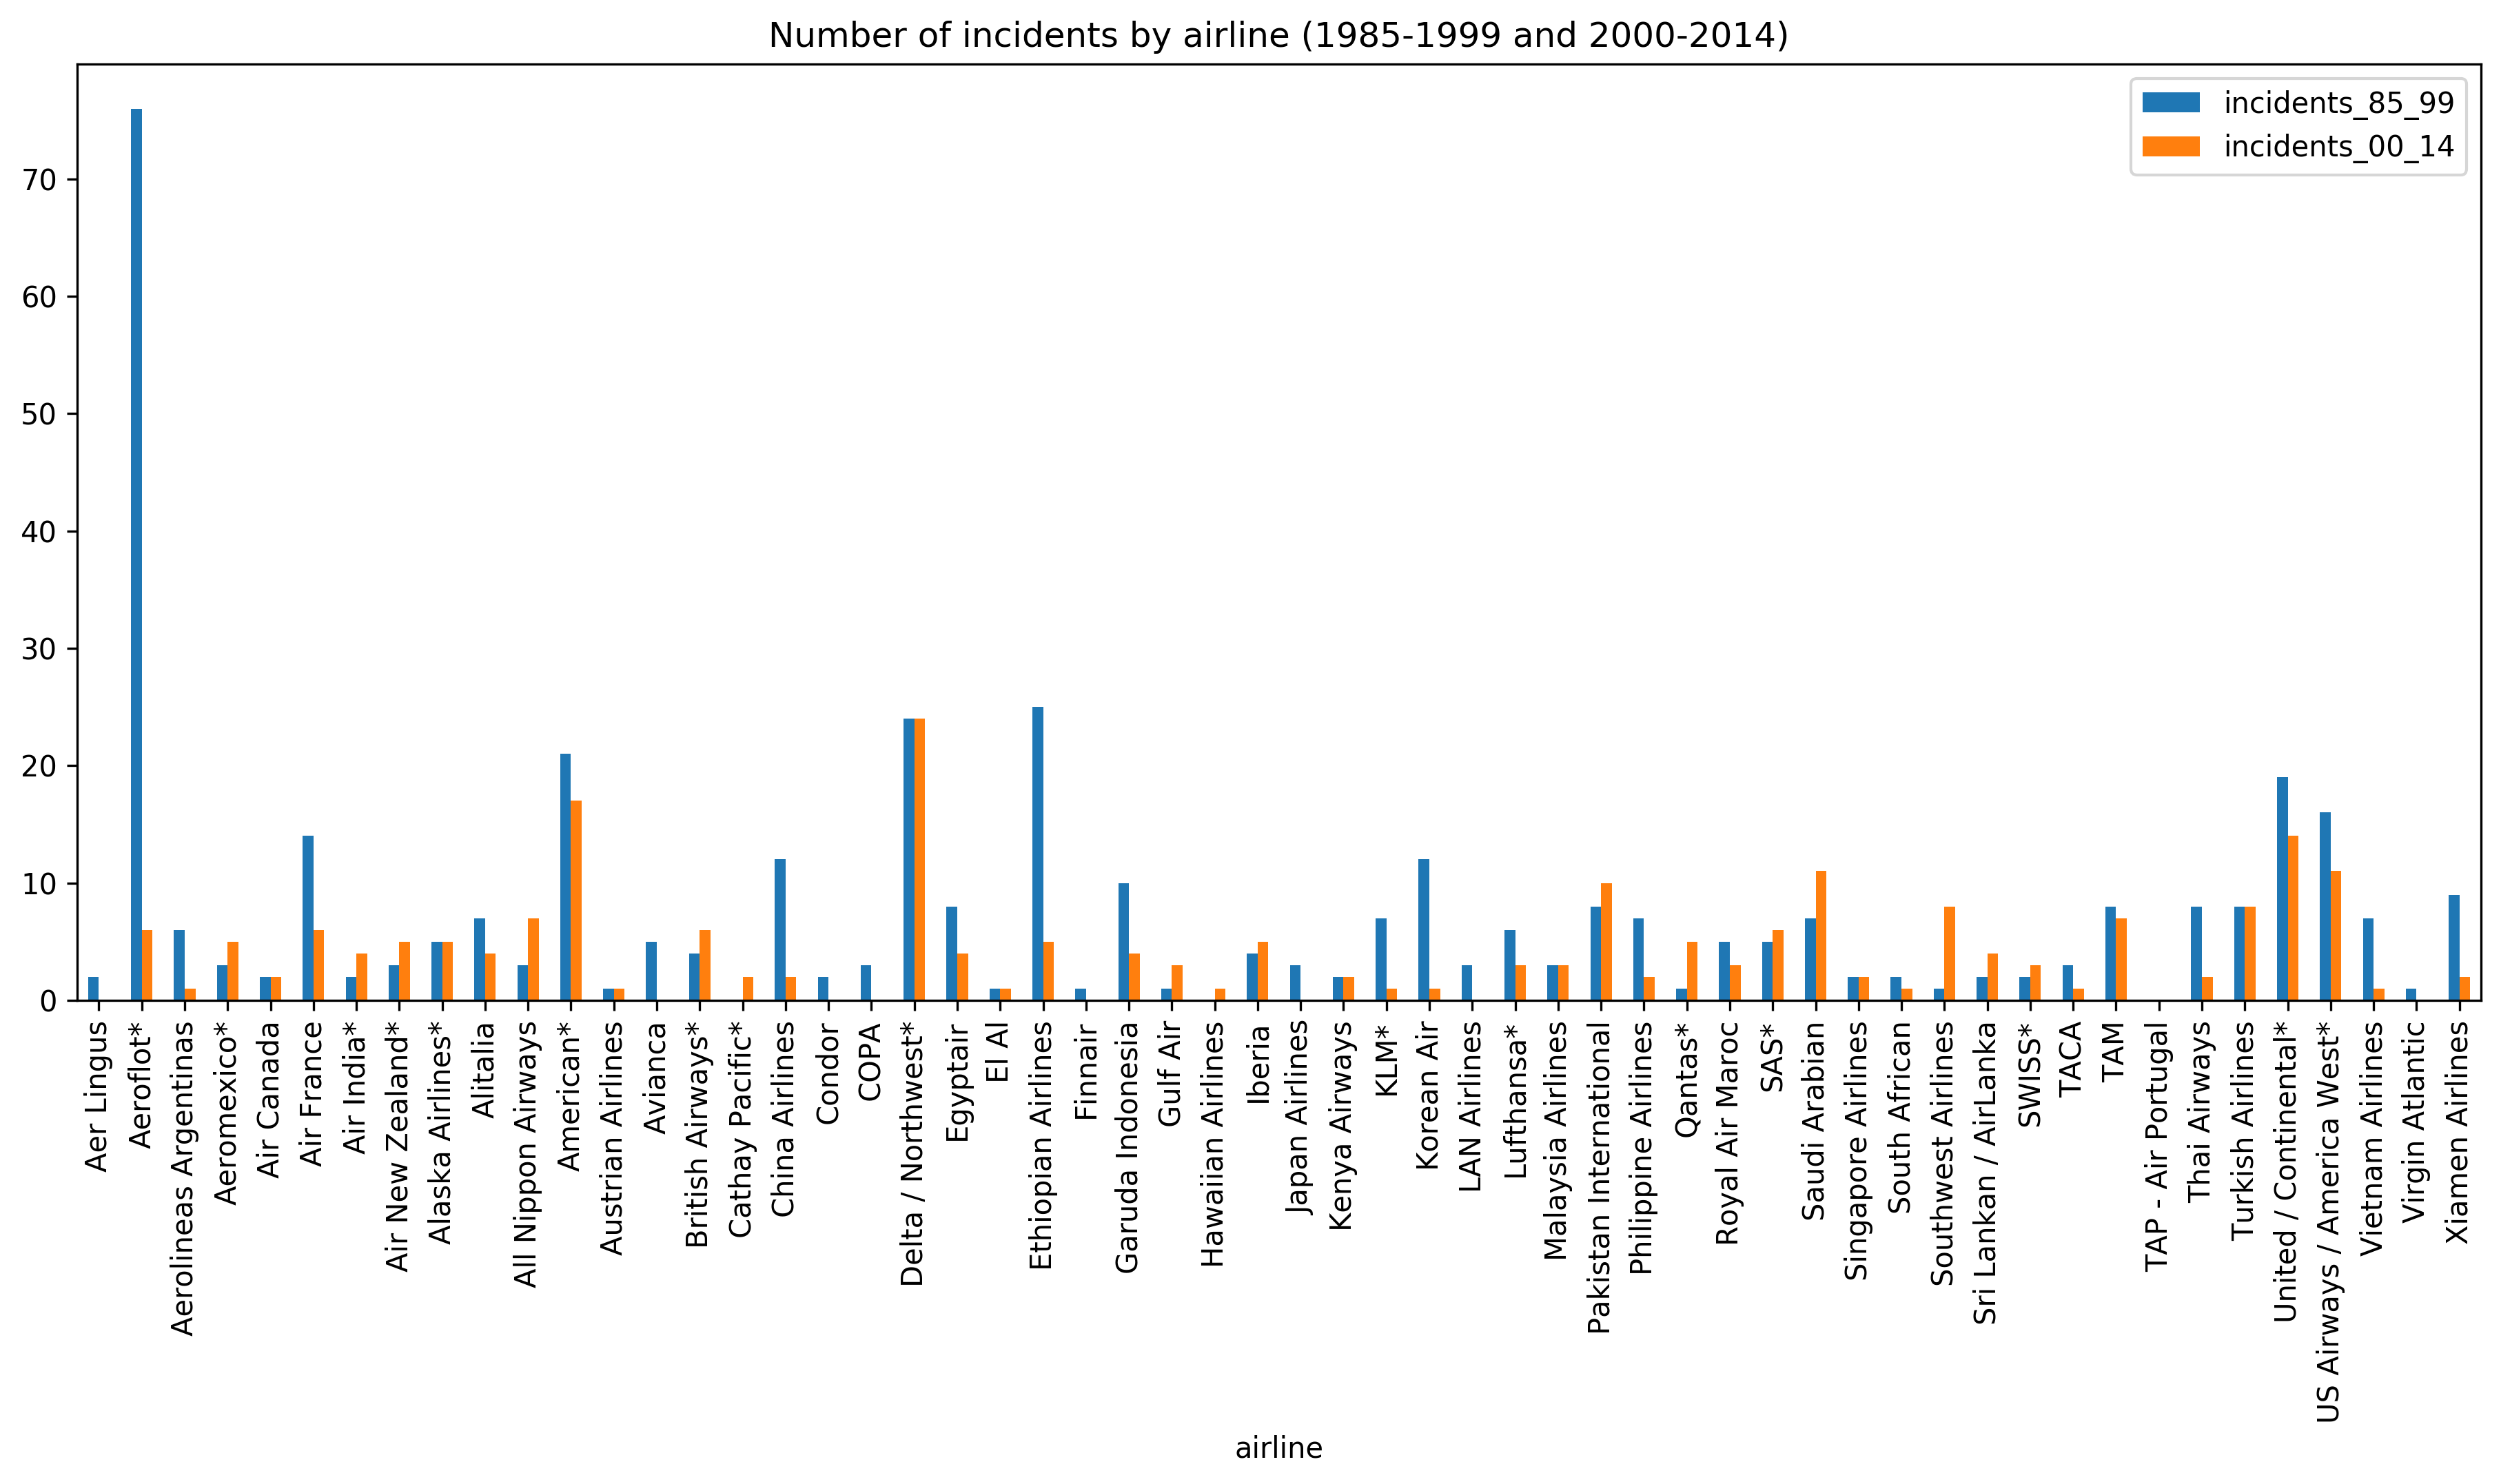

In [8]:
# set figure size and resolution 
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams['figure.dpi'] = 300

#plot bar graph of incidents by airline (1985-1999 and 2000-2014)
plot_incidents = airline_data.plot(x='airline', y=['incidents_85_99', 'incidents_00_14'], kind='bar', title='Number of incidents by airline (1985-1999 and 2000-2014)')


By looking at the graph, we can see that our earlier assumption (incidents have reduced from 1985-1999 to 2000-2014) is not true for every airline; for some airlines, incidents stayed the same or even increased.

<mark>Plot two more graphs: one for the number of fatal accidents by airline and one for the number of fatalities by airline. What do they show?</mark>

In [9]:
# your code here (graph one)

In [10]:
# your code here (graph two)

Measures of central tendency are not the best representation of a data set becuase they are affected by outliers, which are values that are far from the majority of the values in the data set. Outliers could be a result of poor data collection or just variance in the data. 

Let's have a look at the outliers in our data by looking at box plots.

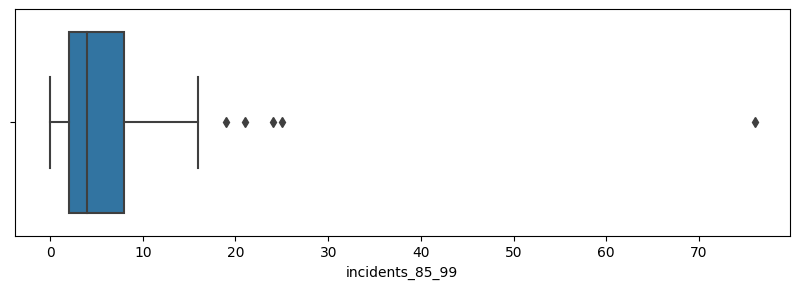

In [11]:
# set figure size and resolution 
plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100

# create box plot for incidents_85_99 and assign to 'incidents_85_99_boxplot'
incidents_85_99_boxplot = sns.boxplot(x=airline_data['incidents_85_99'])

The boxplot shows the 2nd and 3rd quartiles of the data (blue box), the median (the line in the blue box) and the whiskers (the smallest and largest data points that are not outliers).
There are 5 outliers between 15 to 80. 

<mark>Create another box plot for incidents_00_14. Do you notice anything? Are there outliers? </mark>

In [12]:
# your code here

## Correlation

We can also look at outliers by looking at correlations. A correlation shows how strongly pairs of variables are related. If we are looking at airline incident data, we might want to look at the correlation between incidents in 1985-1999 and incidents in 2000-2014. This might tell us if there is a relationship between airline incidents from one time period to the next, i.e., whether the incident track record of an airline can be used to predict the current/future safety of the airline.

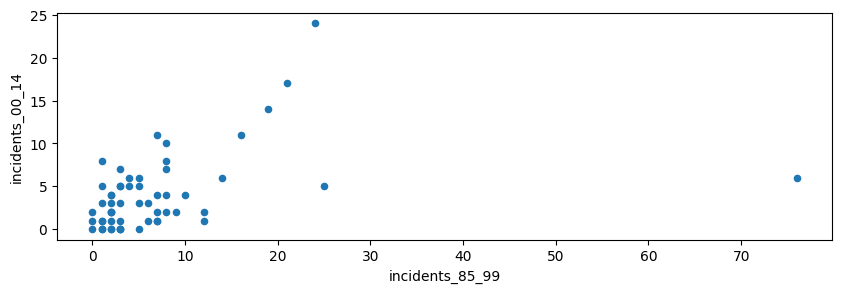

In [13]:
# plot the correlation between incidents in 1985-1999 and 2000-2014
airline_data.plot('incidents_85_99', 'incidents_00_14', kind='scatter')
plt.show()                     

From the scatter plot, there seems to be a positive correlation, i.e., a relationship between airline incidents from one time period to another. But let's take a look at whether this correlation means anything.

In [16]:
# calculate correlation coefficients for all variables
airline_data.corr(method ='pearson')

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
avail_seat_km_per_week,1.000000,0.279538,0.468300,0.209835,0.725917,0.375673,0.228484
incidents_85_99,0.279538,1.000000,0.856991,0.274394,0.403009,0.390249,0.195337
fatal_accidents_85_99,0.468300,0.856991,1.000000,0.540866,0.572923,0.498758,0.186985
fatalities_85_99,0.209835,0.274394,0.540866,1.000000,0.273696,0.228180,0.046979
incidents_00_14,0.725917,0.403009,0.572923,0.273696,1.000000,0.598071,0.282009
fatal_accidents_00_14,0.375673,0.390249,0.498758,0.228180,0.598071,1.000000,0.695864
fatalities_00_14,0.228484,0.195337,0.186985,0.046979,0.282009,0.695864,1.000000


In this chart, we can see the correlation coeffections between all variables. The closer the number to 1.0, the stronger the relationship, and the closer the number to 0, the weaker the relationship.\
We can see the correlation between airline incidents in 1985-1999 and 2000-2014 is 0.4, which is is moderate in statistical terms. 

<mark>Try creating scatter plots between other variables. Do you notice anything? Are there outliers? Which variables are strongly related and which are not?</mark>

In [15]:
# your code here

Correlating variables in a large data set is a good starting point before further analyzing the data, but it is just a starting point. Correlations are not very informtive in terms of making predictions and data models, but this is beyond this introduction. Feel free to check out any of the links on this page to learn more about Python and data science: https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#machine-learning-statistics-and-probability